In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.size

17600

In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# Defining Features and Target Columns

In [9]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [10]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [11]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features.values,target,test_size = 0.2,random_state =2)

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
print("Score = ",score)

Score =  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [15]:
#Saving trained Decision Tree
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Naive Bayes 

In [16]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [17]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
print("Score = ",score)

Score =  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [18]:
#Saving Naive Bayes Model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [20]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
print("Score = ",score)

Score =  [0.95       0.96590909 0.94772727 0.96590909 0.94318182]


In [21]:
#Saving Regression Model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

#Saving Regression Model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

In [23]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
print("Score = ",score)

Score =  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [24]:
#Saving Random Forest Model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(Xtrain,Ytrain)
predicted_values = KNN_model.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
 

In [26]:
score = cross_val_score(KNN_model,features,target,cv=5)
print("Score = ",score)

Score =  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [27]:
#Saving Trained model
# Dump the trained Naive Bayes classifier with Pickle
KNN_pkl_filename = 'KNN.pkl'
# Open the file to save as pkl file
KNN_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN_model, KNN_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [28]:
print(model)

['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'RF', 'KNN']


# Comparative Analysis

In [29]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
KNN --> 0.975


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

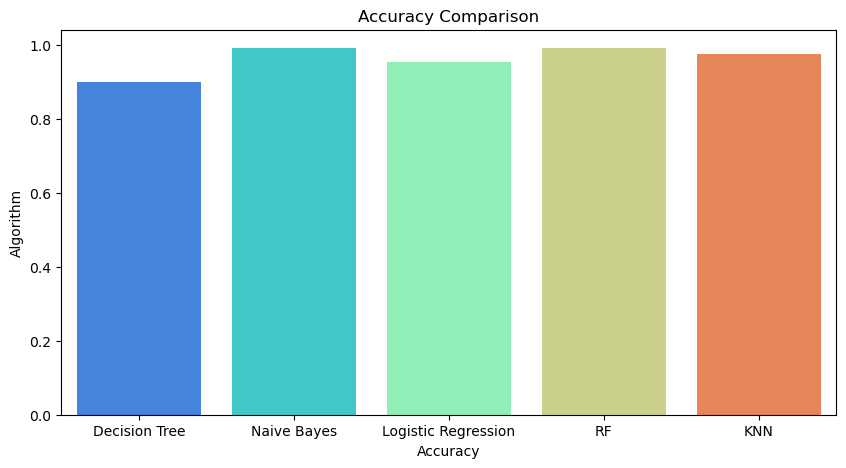

In [30]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = model,y = acc,palette='rainbow')

# Demo Predictions

In [31]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction1 = DecisionTree.predict(data)
print("Decision Tree = ", prediction1)
prediction2 = NaiveBayes.predict(data)
print("Naive Bayes = ", prediction2)
prediction4 = LogReg.predict(data)
print("Logistic Regression = ", prediction4)
prediction5 = RF.predict(data)
print("Random Forest = ", prediction5)
prediction7 = KNN_model.predict(data)
print("KNN = ", prediction7)

Decision Tree =  ['coffee']
Naive Bayes =  ['coffee']
Logistic Regression =  ['coffee']
Random Forest =  ['coffee']
KNN =  ['coffee']


In [32]:
data = np.array([[23, 55, 10, 28, 28.3, 9.0, 110.9]])
prediction1 = DecisionTree.predict(data)
print("Decision Tree = ", prediction1)
prediction2 = NaiveBayes.predict(data)
print("Naive Bayes = ", prediction2)
# There is no model named SVG defined in this notebook, so remove this line.
# If you want to use Logistic Regression, the correct variable is LogReg:
prediction4 = LogReg.predict(data)
print("Logistic Regression = ", prediction4)
prediction5 = RF.predict(data)
print("Random Forest = ", prediction5)
prediction7 = KNN_model.predict(data)
print("KNN = ", prediction7)

Decision Tree =  ['pigeonpeas']
Naive Bayes =  ['pigeonpeas']
Logistic Regression =  ['pigeonpeas']
Random Forest =  ['pigeonpeas']
KNN =  ['kidneybeans']


In [33]:
data = np.array([[120, 45, 20, 28, 34.3, 5.0, 120.9]])
prediction1 = DecisionTree.predict(data)
print("Decision Tree = ", prediction1)
prediction2 = NaiveBayes.predict(data)
print("Naive Bayes = ", prediction2)
prediction4 = LogReg.predict(data)
print("Logistic Regression = ", prediction4)
prediction5 = RF.predict(data)
print("Random Forest = ", prediction5)
prediction7 = KNN_model.predict(data)
print("KNN = ", prediction7)

Decision Tree =  ['coffee']
Naive Bayes =  ['coffee']
Logistic Regression =  ['coffee']
Random Forest =  ['coffee']
KNN =  ['coffee']
